In [ ]:
import matplotlib.pyplot as plt
import pandas as pd,datetime
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML_Assignments/sales-of-shampoo-over-a-three-ye.csv')
data.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [ ]:
data['Month'] = data.Month.apply(lambda x: "198"+x)
data.Month.head()

0    1981-01
1    1981-02
2    1981-03
3    1981-04
4    1981-05
Name: Month, dtype: object

In [ ]:
data.drop(data.index[(data["Month"] == "198Sales of shampoo over a three year period")],axis=0,inplace=True)

In [ ]:
data['Month']=pd.to_datetime(data['Month'])+pd.tseries.offsets.MonthEnd(0)

In [ ]:
data.head()

,Month,Sales of shampoo over a three year period
0,1981-01-31,266.0
1,1981-02-28,145.9
2,1981-03-31,183.1
3,1981-04-30,119.3
4,1981-05-31,180.3


In [ ]:
data['Month'] = pd.to_datetime(data['Month'], format = '%Y-%m-%d %H:%M')

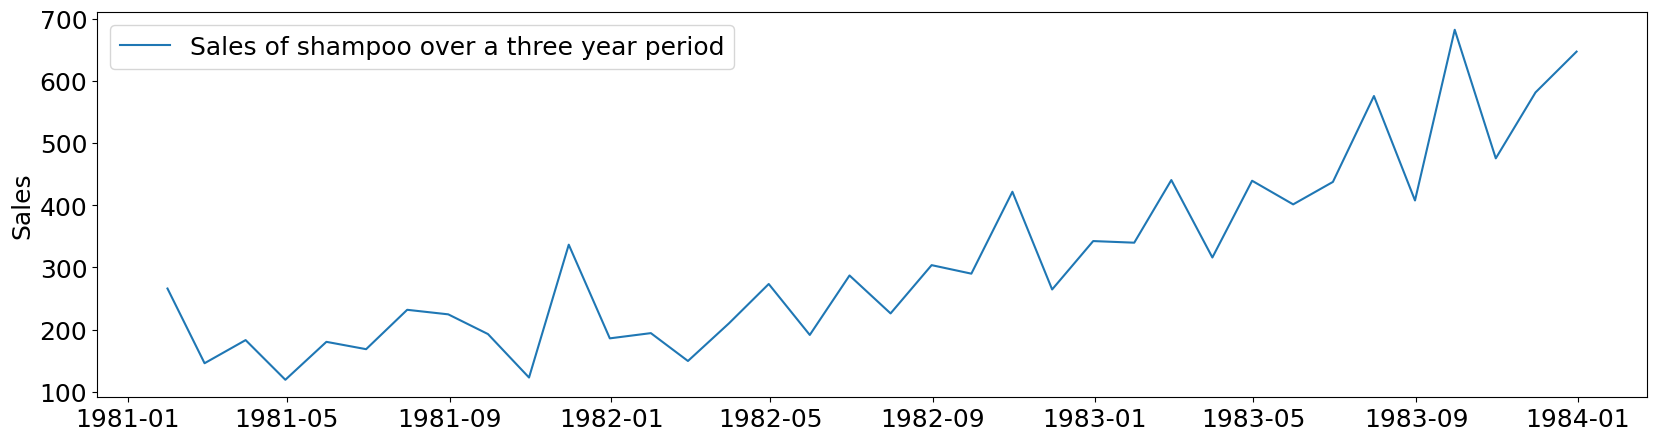

In [ ]:
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(figsize = (20,5))

ax.plot(data['Month'], data['Sales of shampoo over a three year period'], label = 'Sales of shampoo over a three year period')

ax.legend()
ax.set_ylabel('Sales')

plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
check_stationarity(data['Sales of shampoo over a three year period'])

ADF Statistic: 3.060142
p-value: 1.000000
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
Non-stationary


In [ ]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(data['Sales of shampoo over a three year period'])

Results of Dickey-Fuller Test:
Test Statistic                  3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [ ]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
kpss_test(data['Sales of shampoo over a three year period'])

Results of KPSS Test:
Test Statistic           0.752776
p-value                  0.010000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-14-810a879b4a66>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


<Axes: >

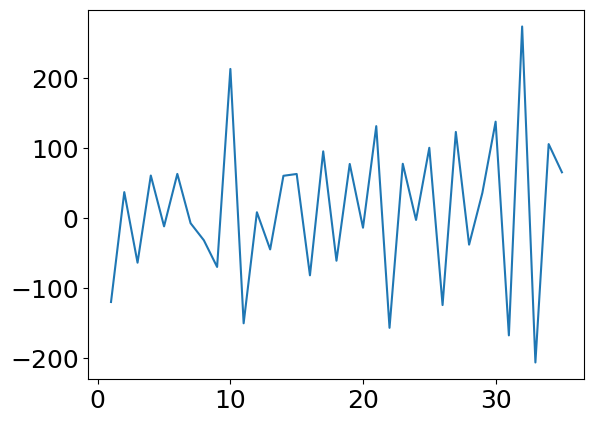

In [ ]:
#differen
data['#Sales_diff'] = data['Sales of shampoo over a three year period'] - data['Sales of shampoo over a three year period'].shift(1)
data['#Sales_diff'].dropna().plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

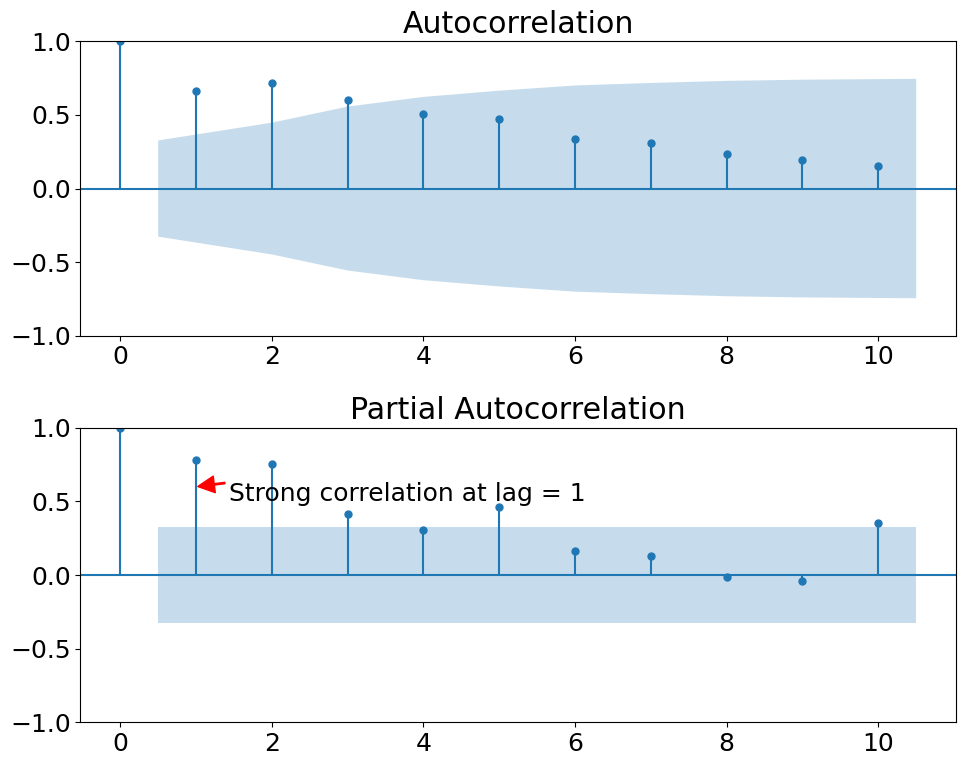

In [ ]:
width = 10
height = 4
lag_acf = 10
lag_pacf = 10
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(data['Sales of shampoo over a three year period'],lags=lag_acf, ax=ax[0])
plot_pacf(data['Sales of shampoo over a three year period'],lags=lag_pacf, ax=ax[1], method='ols')

ax[1].annotate('Strong correlation at lag = 1', xy=(1, 0.6),  xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

In [ ]:
check_stationarity(data['#Sales_diff'].dropna())

ADF Statistic: -7.249074
p-value: 0.000000
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616
Stationary


In [ ]:
data['#Sales_diff'].shape

(36,)

In [ ]:
data["#Sales_diff"].isnull().sum()

1

In [ ]:
data["#Sales_diff"] = data["#Sales_diff"].fillna(0.0)

In [ ]:
data.head()

,Month,Sales of shampoo over a three year period,#Sales_diff
0,1981-01-31,266.0,0.0
1,1981-02-28,145.9,-120.1
2,1981-03-31,183.1,37.2
3,1981-04-30,119.3,-63.8
4,1981-05-31,180.3,61.0


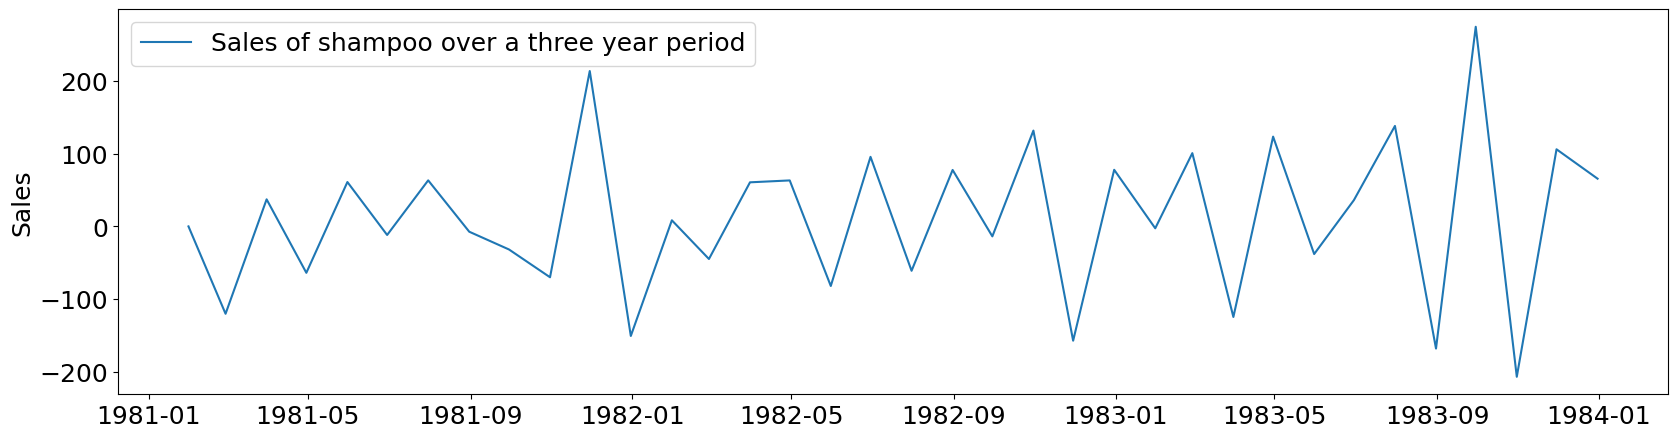

In [ ]:
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(figsize = (20,5))

ax.plot(data['Month'], data['#Sales_diff'], label = 'Sales of shampoo over a three year period')

ax.legend()
ax.set_ylabel('Sales')

plt.show()

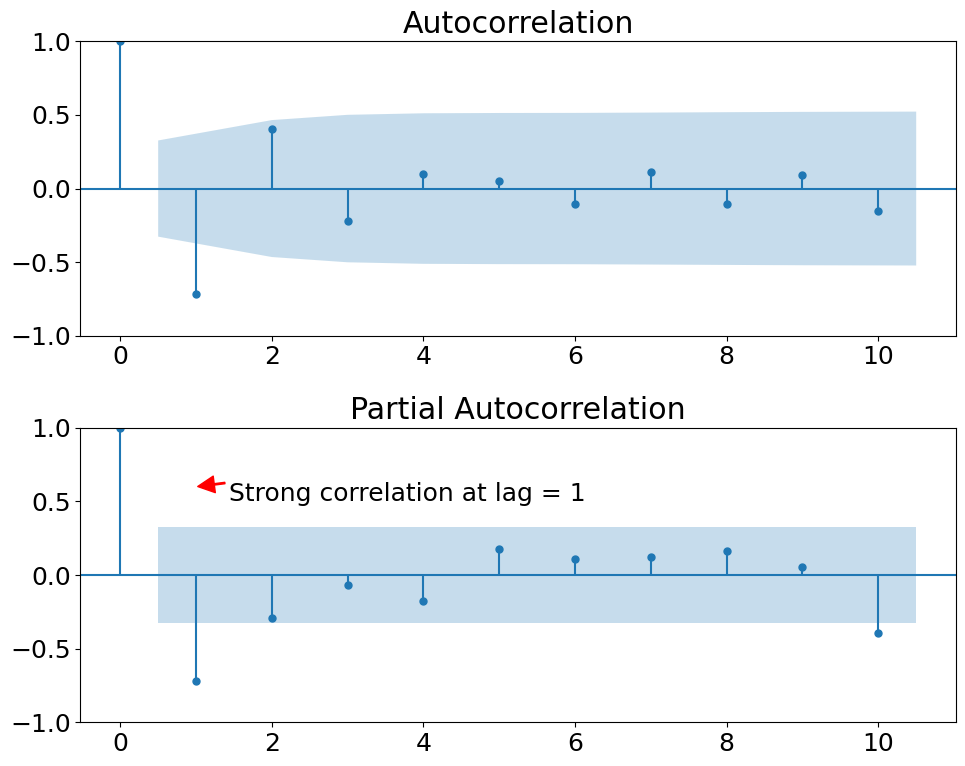

In [ ]:
width = 10
height = 4
lag_acf = 10
lag_pacf = 10
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(data['#Sales_diff'],lags=lag_acf, ax=ax[0])
plot_pacf(data['#Sales_diff'],lags=lag_pacf, ax=ax[1], method='ols')

ax[1].annotate('Strong correlation at lag = 1', xy=(1, 0.6),  xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

In [ ]:
data.head()

,Month,Sales of shampoo over a three year period,#Sales_diff
0,1981-01-31,266.0,0.0
1,1981-02-28,145.9,-120.1
2,1981-03-31,183.1,37.2
3,1981-04-30,119.3,-63.8
4,1981-05-31,180.3,61.0


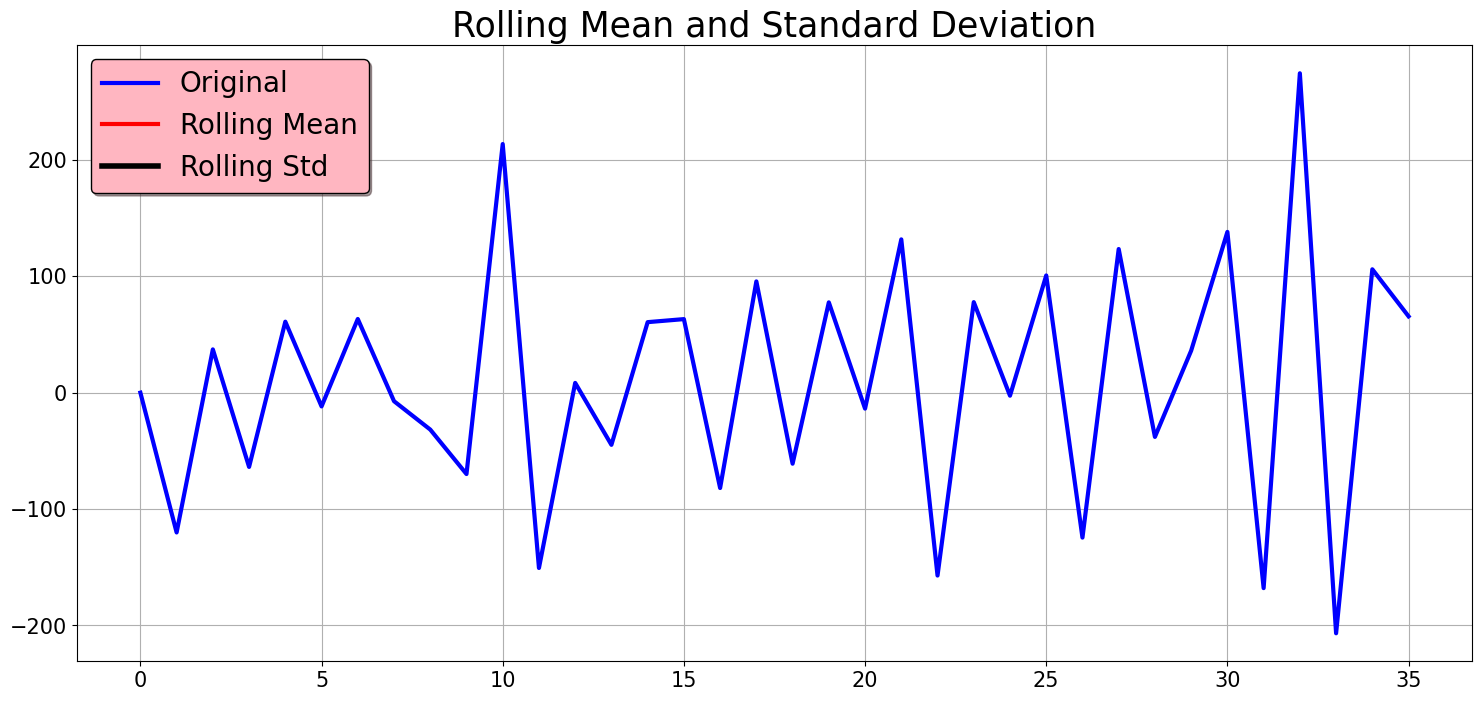

Results of dickey fuller test
Test Statistics               -6.970943e+00
p-value                        8.668352e-10
No. of lags used               1.000000e+00
Number of observations used    3.400000e+01
critical value (1%)           -3.639224e+00
critical value (5%)           -2.951230e+00
critical value (10%)          -2.614447e+00
dtype: float64


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(data['#Sales_diff'])

In [ ]:
X_train,X_test = data['#Sales_diff'][:25],data['#Sales_diff'][25:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
history=[x for x in X_train]

In [ ]:
model=ARIMA(history,order=(1,1,1))

In [ ]:
model=model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   25
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -137.599
Date:                Mon, 30 Oct 2023   AIC                            281.197
Time:                        17:59:50   BIC                            284.731
Sample:                             0   HQIC                           282.135
                                 - 25                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5971      0.228     -2.620      0.009      -1.044      -0.150
ma.L1         -0.9915      1.402     -0.707      0.480      -3.740       1.757
sigma2      4666.4941   6008.581      0.777      0.437   -7110.109    1.64e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.97   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.32   Prob(JB):                         0.78
Heteroskedasticity (H):               1.24   Skew:                             0.34
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.forecast()

array([6.55141926])

In [ ]:
test = [x for x in X_test]

In [ ]:
test[0]

100.69999999999999

In [ ]:
mean_squared_error([test[0]],model.forecast())

8863.955254976992